<a href="https://colab.research.google.com/github/makerseok/study-dl/blob/main/day02/day2_heart_disease_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### 데이터 로드

In [ ]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'hsl', 'HeartDisease']
raw_data = pd.read_excel('/content/heart-disease.xlsx', header=None, names=column_name)
raw_data

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [ ]:
raw_data.describe()

,age,sex,cp,treshbps,fbs,restecg,thalach,exang,oldpeak,slope,HeartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.983498,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994883,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


### 결측지 제거

In [ ]:
clean_data = raw_data.replace('?', np.nan)
clean_data = clean_data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hsl           296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB


### feature, target 분할

In [ ]:
# 가장 끝 값 꺼내옴
keep = column_name.pop()
print(keep)
print(column_name)

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'hsl']


In [ ]:
# feature, target 분할
feature = clean_data[column_name]
target = clean_data[[keep]]
feature.shape, target.shape

((296, 13), (296, 1))

In [ ]:
print(target.sum())
print(target.mean())

HeartDisease    136
dtype: int64
HeartDisease    0.459459
dtype: float64


### feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(feature)
scaled_feature = pd.DataFrame(scaled_feature, columns=column_name)
scaled_feature

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl
0,0.942285,0.692820,-2.236793,0.747441,-0.277228,2.425638,1.020526,0.014451,-0.692820,1.074839,2.264087,-0.718421,0.660262
1,1.385714,0.692820,0.876486,1.592523,0.742265,-0.412263,-0.993312,-1.818794,1.443376,0.386756,0.645320,2.487397,-0.890830
2,-1.939999,0.692820,-0.161274,-0.097641,0.049779,-0.412263,-0.993312,1.629453,-0.692820,2.106963,2.264087,-0.718421,-0.890830
3,-1.496571,-1.443376,-1.199033,-0.097641,-0.835064,-0.412263,1.020526,0.974723,-0.692820,0.300746,-0.973448,-0.718421,-0.890830
4,0.166286,0.692820,-1.199033,-0.661029,-0.219521,-0.412263,-0.993312,1.236615,-0.692820,-0.215316,-0.973448,-0.718421,-0.890830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.277143,-1.443376,0.876486,0.465747,-0.123343,-0.412263,-0.993312,-1.164064,1.443376,-0.731379,0.645320,-0.718421,1.177293
292,-1.053142,0.692820,-2.236793,-1.224417,0.319079,-0.412263,-0.993312,-0.771225,-0.692820,0.128725,0.645320,-0.718421,1.177293
293,1.496571,0.692820,0.876486,0.691102,-1.046657,2.425638,-0.993312,-0.378387,-0.692820,2.020953,0.645320,1.418791,1.177293
294,0.277143,0.692820,0.876486,-0.097641,-2.239272,-0.412263,-0.993312,-1.513253,1.443376,0.128725,0.645320,0.350185,1.177293


In [ ]:
scaled_feature.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,4.500904e-18,1.001693,-2.826856,-0.720571,0.166286,0.720571,2.494285
sex,296.0,2.850573e-17,1.001693,-1.443376,-1.443376,0.692820,0.692820,0.692820
cp,296.0,1.200241e-16,1.001693,-2.236793,-0.161274,-0.161274,0.876486,0.876486
treshbps,296.0,6.067781e-16,1.001693,-2.125838,-0.661029,-0.097641,0.465747,3.846075
chol,296.0,1.997276e-17,1.001693,-2.335451,-0.700414,-0.084871,0.554717,6.089796
fbs,296.0,7.501507e-19,1.001693,-0.412263,-0.412263,-0.412263,-0.412263,2.425638
restecg,296.0,2.182939e-16,1.001693,-0.993312,-0.993312,-0.489853,1.020526,1.020526
thalach,296.0,6.458797e-16,1.001693,-3.433796,-0.694840,0.145397,0.712830,2.284183
exang,296.0,5.926190e-17,1.001693,-0.692820,-0.692820,-0.692820,1.443376,1.443376
oldpeak,296.0,-7.951597e-17,1.001693,-0.903399,-0.903399,-0.215316,0.472766,4.429243


### 데이터를 train과 test로 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_feature, target, test_size=.3
)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (207, 13)
y_train shape: (207, 1)
X_test shape: (89, 13)
y_test shape: (89, 1)


### 모델 생성

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=13, activation='relu'))
model.add(Dropout(0.5)) # 과적합 방지를 위한 규제(망각)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) # 과적합 방지를 위한 규제(망각)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 과적합 방지를 위한 규제(망각)
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               7168      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

### 모델 학습

In [ ]:
model.compile(loss='mse', # 손실함수
              optimizer='adam', # 정규화기
              metrics=['binary_accuracy']) # 평가 기준(학습에 영향 x)
fit_hist = model.fit(X_train, y_train, batch_size=50, epochs=50, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 1s 45ms/step - loss: 0.2618 - binary_accuracy: 0.4667 - val_loss: 0.1996 - val_binary_accuracy: 0.8810
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2162 - binary_accuracy: 0.7091 - val_loss: 0.1588 - val_binary_accuracy: 0.9048
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1867 - binary_accuracy: 0.7394 - val_loss: 0.1300 - val_binary_accuracy: 0.8810
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1648 - binary_accuracy: 0.8000 - val_loss: 0.1076 - val_binary_accuracy: 0.9048
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1484 - binary_accuracy: 0.8061 - val_loss: 0.0934 - val_binary_accuracy: 0.9048
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.1520 - binary_accuracy: 0.7697 - val_loss: 0.0869 - val_binary_accuracy: 0.9048
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 0.1369 - binary_a

### 결과 확인

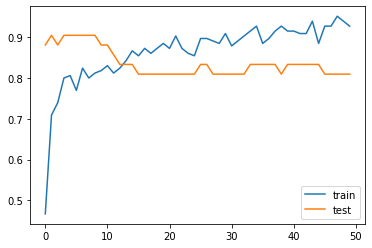

In [ ]:
# train, test accuracy 확인
plt.plot(fit_hist.history['binary_accuracy'], label='train')
plt.plot(fit_hist.history['val_binary_accuracy'], label='test')
plt.legend(loc='best')
plt.show()

In [ ]:
# 해당 모델의 loss와 accuracy
score = model.evaluate(X_test, y_test, verbose=1)
print('Keras DNN model loss:', score[0])
print('Keras DNN model accuracy:', score[1])

3/3 [==============================] - 0s 3ms/step - loss: 0.1536 - binary_accuracy: 0.7978
Keras DNN model loss: 0.15361681580543518
Keras DNN model accuracy: 0.7977527976036072


In [ ]:
# confusion matrix, f1 score 확인
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred > 0.5)
print(confusion_matrix(y_test, pred))
print(f1_score(y_test, pred, average='micro'))

[[44  7]
 [11 27]]
0.797752808988764


In [ ]:
my_sample = np.random.randint(89)
sample_data = np.array(X_test.iloc[my_sample])
sample_data = sample_data.reshape(-1, 13)
print(model.predict(sample_data))
print(y_test.iloc[my_sample])

[[0.00614436]]
HeartDisease    0
Name: 162, dtype: int64


In [ ]:
my_sample

81